In [ ]:
 
# import os
# from tensorflow.python.client import device_lib
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "99"
# if __name__ == "__main__":
#     print(device_lib.list_local_devices())
 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6040821614768483603
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16334318521666907976
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5117974689986590866
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14648777152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3327675903140826194
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
 
# import os
# from tensorflow.python.client import device_lib
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "99"
# if __name__ == "__main__":
#     print(device_lib.list_local_devices())
 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16090874686789852403
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 566782675462982563
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11701218116929187288
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7298761376
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16899116940698906233
physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"
]


In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import multiprocessing as mp
print('CPU numbers:',mp.cpu_count())
def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    workers = kwargs.pop('workers')
    pool = mp.Pool(processes=workers)
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    return pd.concat(list(result))
#apply_by_multiprocessing(fullset['Text'], process_text, workers=cores)

CPU numbers: 2


In [ ]:
#比较CPU & GPU效率
import tensorflow as tf
import time

def performanceTest(device_name,size):
    with tf.device(device_name):
        W = tf.random_normal([size, size], name='W')
        X = tf.random_normal([size, size], name='X')
        mul = tf.matmul(W, X, name='mul')
        sum_result = tf.reduce_sum(mul, name='sum')

    startTime = time.time()
    tfconfig = tf.ConfigProto(log_device_placement=True)
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

    takeTimes = time.time() - startTime
    print(device_name, "矩阵大小：",size,"x",size, " 时间:",takeTimes)
    return takeTimes

gpu_set = [];cpu_set = [];i_set = []
for i in range(0, 5001, 200):
    c = performanceTest("/cpu:0",i)
    g = performanceTest("/gpu:0",i)
    gpu_set.append(g)
    cpu_set.append(c)
    i_set.append(i)

/cpu:0 矩阵大小： 0 x 0  时间: 3.7311766147613525
/gpu:0 矩阵大小： 0 x 0  时间: 3.3360726833343506
/cpu:0 矩阵大小： 200 x 200  时间: 3.4266135692596436
/gpu:0 矩阵大小： 200 x 200  时间: 3.4319212436676025
/cpu:0 矩阵大小： 400 x 400  时间: 3.4788966178894043
/gpu:0 矩阵大小： 400 x 400  时间: 4.172472953796387
/cpu:0 矩阵大小： 600 x 600  时间: 5.864904880523682
/gpu:0 矩阵大小： 600 x 600  时间: 5.055714130401611
/cpu:0 矩阵大小： 800 x 800  时间: 5.222900629043579
/gpu:0 矩阵大小： 800 x 800  时间: 4.618476629257202
/cpu:0 矩阵大小： 1000 x 1000  时间: 5.015220880508423
/gpu:0 矩阵大小： 1000 x 1000  时间: 5.057186841964722
/cpu:0 矩阵大小： 1200 x 1200  时间: 5.0034003257751465
/gpu:0 矩阵大小： 1200 x 1200  时间: 5.449036121368408
/cpu:0 矩阵大小： 1400 x 1400  时间: 5.582128524780273
/gpu:0 矩阵大小： 1400 x 1400  时间: 5.297083139419556
/cpu:0 矩阵大小： 1600 x 1600  时间: 5.8435773849487305
/gpu:0 矩阵大小： 1600 x 1600  时间: 5.1150758266448975
/cpu:0 矩阵大小： 1800 x 1800  时间: 5.6617748737335205
/gpu:0 矩阵大小： 1800 x 1800  时间: 5.487414121627808
/cpu:0 矩阵大小： 2000 x 2000  时间: 6.115336179733276
/gpu:0 矩阵大小

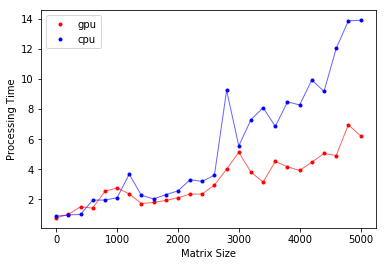

In [ ]:
#matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.xlabel('Matrix Size')
plt.ylabel('Processing Time')
plt.plot(i_set, gpu_set, 'r.',label='gpu')
plt.plot(i_set,gpu_set, color='r',linewidth=1, alpha=0.6)
plt.plot(i_set, cpu_set, 'b.',label='cpu')
plt.plot(i_set, cpu_set, color='b',linewidth=1, alpha=0.6)
plt.legend()
plt.show()

<div style="background:#666;color:black">
    
Google colab results
![Google Colab Results](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAEKCAYAAAARnO4WAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3Xd4lFXa+PHvmWRSSEICIUBCgISm%0AFEmAIIYiASmKiGLX1VXfd3+Iveyq6Bbb+rrqFtnVdUXdtaDYQcVVwUCoA5JgkF6lBBJKIJ1k2vn9%0AcVIIkDBJZlLvz3U9V5LJM89zZpK558x57nMfpbVGCCFE62dp6gYIIYRoHBLwhRCijZCAL4QQbYQE%0AfCGEaCMk4AshRBshAV8IIdoICfhCCNFGSMAXQog2QgK+EEK0Ef5N3YBTderUScfFxTV1M4QQosXI%0AyMg4prWO8mTfZhXw4+LiSE9Pb+pmCCFEi6GU2ufpvjKkI4QQbYQEfCGEaCMk4AshRBvRrMbwz8bh%0AcJCVlUVpaWlTN6XFCQoKIjY2FqvV2tRNEUI0A80+4GdlZREWFkZcXBxKqaZuTouhtSY3N5esrCzi%0A4+ObujlCiGag2Q/plJaWEhkZKcG+jpRSREZGyicjIUSlZh/wAQn29STPmxDNX36+jX37nic/3+bz%0AczX7IR0hhGit8vNtbNw4HovFzr59gSQkpBIenuyz87WIHn5TO3z4MDfffDO9evVi2LBhJCcnM3/+%0AfNLS0ggPDycxMZH+/fvz9NNPA/D2229z7733VjtGSkqKTCoTQlSTl5dGx45lRES4cbvt5OWl+fR8%0AEvDPQWvNVVddxcUXX8yePXvIyMjgww8/JCsrC4AxY8aQmZlJeno6c+fOZf369U3cYiFES9GhwyDa%0At7eQm2vBYgkgIiLFp+drnQHfZoPnnzdfG2jJkiUEBAQwc+bMytt69uzJfffdV22/kJAQhg0bxq5d%0Auxp8TiFE29C+/V4iIv5Kjx5/9PlwDrTGMXybDS65BOx2CAiA1FRIrv+TuHnzZoYOHXrO/XJzc1mz%0AZg2///3vWbduXb3PJ4RoKzYBRwgNfZLQ0MYJxa2vh5+WZoK9y2W+pqV59fD33HMPCQkJDB8+HIAV%0AK1YwZMgQJk2axKxZsxg4cGCN2TGSNSOEMFzAp8B1NGa/u/X18FNSTM++ooefktKgww0cOJDPPvus%0A8udXX32VY8eOkZSUBJgx/IULF1a7T2RkJCdOnKh22/Hjx+nUqVOD2iKEaC2WAxHABY161tbXw09O%0ANsM4zz7b4OEcgPHjx1NaWsprr71WeVtJSUmt9xk+fDirVq0iJycHgPT0dMrKyujevXuD2iKEaA2K%0Aga8xvfvG/dTf+nr4YIJ8AwN9BaUUCxYs4KGHHuLFF18kKiqKkJAQXnjhhRrv06VLF2bPns2UKVNw%0Au92EhoYyb948LJbW9/4qhKirhcBQoFujn1lprRv9pDVJSkrSp+eqb926lf79+zdRi1o+ef6EaE6y%0AgT8DTwFhXjmiUipDa53kyb7S5RRCiEbzKXAZ3gr2dSUBXwghGsVm4AiQ0mQtkIAvhBA+5wI+Aa6l%0AKS+dSsAXQgifq0jDHNykrZCAL4QQPtV0aZink4AvhBA+9TUwhKZIwzydBHwP5OTkcOONN9K7d2+G%0ADRvGlClT2LFjB8HBwSQmJjJgwABmzpyJ2+0mLS2NqVOnVrv/7bffzqefftpErRdCNJ0cYC0wrakb%0AArTWiVdepLVm+vTp3HbbbXz44YcAbNiwgcOHD9O7d28yMzNxOp2MHz+eBQsW0LFjxyZusRCi+fiE%0ApkzDPJ1Pe/hKqQil1KdKqW1Kqa1KKd/W/iznxerILF26FKvVWq08ckJCQrUyCf7+/owcOVJKIwsh%0ATtH0aZin83UPfzbwrdb6WqVUANDOx+fzdnVkNm3axLBhw2rdp6SkhNTUVJ555pn6n0gI0Yq4aQ5p%0AmKfzWQ9fKRUOXAy8BaC1tmut83x1vgo+ro5cze7du0lMTGTUqFFcfvnlXHbZZVIaWQiBScMMp6nT%0AME/ny7eeeOAo8B+lVAKQATygtS724Tm9XR2ZgQMH1njBtWIM/1RSGlmIti0/fwnwJEo9Qvv2zauj%0A58sxfH9MSbjXtNZDMMmos07fSSk1QymVrpRKP3r0aINP6uXqyIwfP56ysjLmzJlTedtPP/3EgQMH%0Azrp/3759OXToEFu3bgVg3759bNiwgcTExIY1RAjR7BUWfkxu7mQOHlxFZuaN5Od74UKiF/myh58F%0AZGmt15b//ClnCfha6znAHDDVMr1xYi9WR0Ypxfz583nwwQd54YUXCAoKIi4ujpdffvms+wcGBjJ3%0A7lzuuOMOSktLsVqtvPnmm4SHh3unQUKIZmg/8AVu92fk5bkpKNCAnby8NJ+vU1sXPgv4WuscpdQB%0ApdR5WuvtwCXAFl+dz5diYmL4+OOPz7h906ZNZ91/1KhRrFmzxtfNEkI0uWzgS2A3MAVIpKhoMmDH%0AYgkgIiKlKRt3Bl9fPr4PeL88Q2cPcIePzyeEEI0gF7OQyUZgIia0BRAeDgkJqeTlpRERkdKsevfg%0A44Cvtc4EPCrML4QQzV8+8F9gHSa//lkguNoe4eHJzS7QV2g+CaJCCNEM5efbyM9fRGRkACEhR4CR%0AwNM0l9mzdSEBXwghapCfb+Pnn1OIjHRw4IA/0dFfER4+uambVW9SPE0IIWpQUPBNebDX5OS4yctb%0A39RNahAJ+EIIUYPISEVBgRW73a9ZZt3UlQT8czhw4ADx8fEcP34cgBMnThAfH8/evXsZNGjQWe/j%0AdDqJiopi1qwzph1Us2PHDqZMmULfvn0ZOnQo119/PYcPHyYtLY3w8HASExPp378/Tz/9NABvv/02%0A9957b7VjpKSkkJ6e7oVHKoSo7jDt2hURG/st8fHPkpCQ2mwvxnpKAv45dO/enbvuuqsyeM+aNYsZ%0AM2bUep/FixfTr18/PvnkE7Q++1yy0tJSLr/8cu666y527tzJ+vXrufvuu6mYbTxmzBgyMzNJT09n%0A7ty5rF/fsj9KCtHyLAAmER4+jp49H2/xwR5aacDPz7exb9/zXpvW/NBDD7FmzRpefvllVq5cyW9+%0A85ta9583bx4PPPAAPXr0wFZDjeYPPviA5ORkrrjiisrbUlJSzvjUEBISwrBhw6T0shCNai9m6tC4%0AJm6Hd7W6gJ+fb2PDhkv4+effs2HDJV4J+larlZdeeomHHnqIl19+GavVWuO+paWlfP/991xxxRXc%0AdNNNzJs376z7eVJ2GSA3N5c1a9YwcODAerdfCFFX84GpQEBTN8SrWl3Az8tLw+22Ay7cblPLwhu+%0A+eYboqOjayynUGHhwoWMGzeO4OBgrrnmGhYsWIDL5arz+VasWMGQIUOYNGkSs2bNYuDAgVJ6WYhG%0AsRU4jsm3b11aXR5+REQKFksAbrf3allkZmayePFi1qxZw+jRo7nxxhtr3HfevHmsXLmSuLg4wPTQ%0AlyxZQvv27bnzzjsBeOaZZxg4cCDLli2r8Thjxoxh4cKF1W6T0stC+JrG9O6vAvyauC3e1+p6+OHh%0AySQkpHrtqrrWmrvuuouXX36ZHj168Mgjj9Q4hl9QUMCKFSvYv38/e/fuZe/evbz66qvMmzePESNG%0AkJmZSWZmJtOmTePmm29m9erVfP3115X3X758ea2fIIYPH86qVavIyckBID09nbKysmrLLQohGqIi%0AOWJoo53Rm0uynkur6+GDd2tZvPHGG/To0YOJEycCcPfdd/Of//yHffv2sX37dmJjYyv3fe655xg/%0AfjyBgYGVt1155ZU8+uijlJWVVbs9ODiYhQsX8uCDD/Lggw9itVoZPHgws2fP5tixY2dtS5cuXZg9%0AezZTpkzB7XYTGhrKvHnzsFha3fu2EE3AhcnMuRlonGFSmw3GjQOHAwIDvbOGR21UTWmDTSEpKUmf%0AnlO+detW+vfv30Qtavnk+RPCUyuAdOChRjvjM8/AU0+B1uDnZxZuevzxuh1DKZWhtfaoSKV0DYUQ%0AAjum3PH0Rj2r2w3+/ibYe2NJ1nNplUM6QghRN0uBXkBco51xyxYoLYVFi8zQTkqKb4dzQAK+EKLN%0AKwEWAY823hlL4N134bbboH9/3/fsK8iQjhCijfsOGAJ0abQzfvIJXHCBCfaNSQK+EKINy8NcrL28%0A0c7400+wYwdce22jnbKSBHwhRBv2NTAK6NAoZysuhvffN0M5p2RpNxoJ+Ofgy/LIO3fuZOrUqfTu%0A3Zthw4Yxbtw4li9fDphSyFFRUSQmJjJgwADeeOMNAJ566in+/Oc/VztOXFxcjbn7QoiaHMZMtLq0%0A0c44bx4MGwb9+jXaKauRgH8Ovi6PPGPGDHbv3k1GRgb/+Mc/2LNnT+U+N9xwA5mZmaSlpfHEE09w%0A+PBh7z0wIdq8L4EJQEijnG39eti3D666qlFOd1atMuDbDth4fsXz2A403/LI77//PsnJyUybNq3y%0AtkGDBnH77befsW/nzp3p3bs3+/bta9DjEEJU2AfsAi5plLMVFpre/e23m3z7puLTtEyl1F6gEDNn%0A2enpbLCGsB2wccm7l2B32QnwCyD1l6kkd29YcmtFeeRLL72URYsWeVQe+fXXXycvL4958+YxcuSZ%0AVfc2b97M0KGe1evYs2cPe/bsoU+fPvV+DEKIU83HXKj1ffTV2ozbX3QR9O7t89PVqjF6+OO01omN%0AEewB0vamYXfZcWkXdpedtL1pXjmur8sjT58+nUGDBnH11VdX3vbRRx+RmJjITTfdxOuvv07Hjh2l%0ARLIQDVRYOI+8vC/Jz2+cAY516yAnB075MN9kWt3Eq5S4FAL8Aip7+ClxKQ0+pq/KI1dcoAWYP38+%0A6enp1YaLbrjhBl555ZVqx4+MjCQ7O7vabYWFhURERDT0YQrR6uXnr+DEiV+Sm+umuHiSz9epzc+H%0Ajz+G++6DWgYGGo2v3+I0sEgplaGUqv1Kp5ckd08m9ZepPDvuWa8M5/iyPPKqVav48ssvK+9fUlJy%0AzvZcfPHFfPnllxQWFgLw+eefk5CQgJ9f66vdLYR3aRyOlykrc1FY6PbqAklnPZuGuXNhzBjo2dNn%0Ap6kTX/fwR2utDyqlOgOLlVLbtNbLT92h/I1gBkCPHj28ctLk7skNDvQVfF0e+eGHH+bBBx+kS5cu%0AhIWF8bvf/a7W9gwePJh7772X0aNHo5Sic+fOvPnmm155rEK0bt8QGtqZrVsDAYfXFkiqic0Gx49D%0A+Qf7ZqHRyiMrpZ4CirTWf65pHymP7H3y/AkBkAF8AjxOfv4W8vLSiIhI8dlwzokT8Mc/wkMPwSl9%0AQp9oFuWRlVIhSqmwiu+BSUDtVzyFEMLr9gIfAPcA4YSHJ9Oz5+M+C/arV8Ott0JMjO+DfV35ckin%0ACzC/PHvEH/hAa/2tD88nhBCnOQG8BvwS8P1SoGlpMHmyWcEqNRVGjvR9yeO68FnA11rvARK8dCxJ%0AO6yH5rSamRCNrwx4BTO5yiuhqEalpbBkiVmb1uEwF2wdDvMG0JwCfrOfaRsUFERubq4ErzrSWpOb%0Am0tQUFBTN0WIJuAG3gJ6AhN9dpayMvjuO/jd7yA7G2bNgqCgxlvBqq6afR5+bGwsWVlZHD16tKmb%0A0uIEBQVVyyISou2YD5zEJAB6f3TAbje990WL4Lzz4Ne/huho87vUVPO7xljBqq48DvhKqXZa63Mn%0AinuZ1WolPj6+sU8rhGixVgGZwCy83ad1OGDZMtOr79MHHn7YXJw9VXJy8wv0Fc75bCilRgJvAqFA%0AD6VUAnCn1vpuXzdOCCHqZgemd/8I3qqCabOZXnt4OGRlQVwcPPBA88vA8YQnb39/AyZjaomitd6g%0AlLrYp60SQog6OwLMAX6Ft5YrtNlg3DgzhOPvDx99BNOne+XQTcKji7Za6wOn3XTuamBCCNFoSjAZ%0AOVcC53vtqF9+aYK91uB2w7ZtXjt0k/Ckh3+gfFhHK6WswAPAVt82Swghzi0/30Ze3hI6dz5CcPBo%0AYIzXju12mxmzViu4XM0z66auPAn4M4HZQDfgILAIM2VNCCGaTH6+jQ0bxhMVVcbBg/5ERV1PeLj3%0Ajl+RgbN0qblQ2xyzburqnAFfa30M+EUjtEUIITyWl5dGSIid4GDN/v0urNblhIeP8sqxDx2CxYvh%0AiScgMtLMmG0NPMnSiQfuA+JO3V9r3QzK+Qsh2qqIiOFYLBYOHgQI9FrlS7cb3n4brrzSBPvWxJMh%0AnQWYKWtfYaavCSFEE9OEh+/A3/9Z3G7t1cqX330H7dqZOvatjScBv1Rr/Xeft0QIITz2A3CUkJDf%0AEhLivclVFUM5v/0ttMbyXZ48U7OVUk9iLtaWVdyotV7vs1YJIUSN8jC17e/HmzNpK4Zyrrqq9Q3l%0AVPDk2boAuBUYT9WQji7/WQghGpEG5gJjAe+skFehNQ/lVPAk4F8H9NJa233dGCGEqJ0NU+N+pleP%0A2tqHcip4MtN2ExDh64YIIUTtTgCfAXcgQzn148mzFgFsU0qto/oYvqRlCiEaiQbew4wke7dqWVsY%0AyqngScB/0uetEEKIWq0CCoFLvXrUtjKUU8GTmbbLGqMhQghxdrmYkse/Bvy8dtS2NJRTocaAr5Ra%0AqbUerZQqxHyeqvwVoLXW7X3eOiFEG6eBd4EJQMw59q2btjSUU6G2Hv44AK11WCO1RQghTrMCKMUs%0AyeE9hw7B99+bWjltYSinQm1ZOmsbrRVCCHGGY8AXwO14uHSHR1atgjvuMEsUtpWhnAq19fDb0Pue%0AEKJ50cA7mJ59tNeOarPB+PFmbdrlyyExseWXPK6L2gJ+lFLq4Zp+qbX+qycnUEr5AenAQa311Dq2%0ATwjRJqUBTszYvXdoDf/6lwn2WpuvaWkS8Cv4YRYub2hPv2KFLLnIK4SoVX6+jYKChXTuvJvAwNl4%0AayintBT+/W8IDYXAQBPsW8MKVnVVW8DP1lo/05CDK6VigcuB54AaPy0IIUTFClbdupWxfbuVnj0f%0AIDy84YuR5+TAP/8J558Ps2fDLbeYnn1rWMGqrnw9hv8y8ChQY6aPUmoGMAOgRw/vFkMSQrQceXlp%0AdOxoR2vN8eNOwsPTGlzjfsMGeO89mD4dRpUvhpWc3PYCfYXaPi9d0pADK6WmAke01hm17ae1nqO1%0ATtJaJ0VFRTXklEKIFiwyMoKwMAvZ2RYsloatYKU1fPUVzJsH99xTFezbuhp7+Frr4w089ihgmlJq%0AChAEtFdKzdVa39LA4wohWp3NhIbuwe1eAPzUoBWsTp404/UlJSbPvr1cPazkvZJzp9FaPw48DqCU%0ASgF+I8FeCHGmLOA/wEzat+9D+/aX1/tIFeP1/fvDnXeCv88iXMskT4cQognlAa8CNwB9GnSkzEyY%0AOxeuvhpGjvRG21qfcwb8s9TSAcjH5Nb/Wmu951zH0FqnYRJrhRCiXBkm2I8BhtfrCDYbLF1qevLH%0Aj8O990JcnBeb2Mp40sN/GfOZ6wNM5s6NQG9gPfBvIMVXjRNCtFZu4E1MbfvL6nWEilmzZWXg5wff%0AfCPB/lw8mdUwTWv9uta6UGtdoLWeA0zWWn8EdPBx+4QQrdIngB34BfXNAE9LA7vdZOS43bBunReb%0A10p5EvBLlFLXK6Us5dv1mPJ1cOZQjxBCnMMSzOT7O2nIZcTBg02lS4vFzJ5ta7Nm68OTZ/sXwGzg%0An5gAvwa4RSkVDNzrw7YJIVqdDcC3wGNAu3ofRWvYsQP++lcoLm6bs2brw5MVr/YAV9Tw65XebY4Q%0AovXah1nM5D6gYXWJ16wxefaPP256+MIznmTpRAH/D4g7dX+t9f/4rllCiNblOGaQ4BZMKKm/wkL4%0A7DO4/34J9nXlyZDOF5hlZ74HXL5tjhCiNcnPt5GXt5guXfYTFHQDMKTBx/zkExgxAqT0Vt15EvDb%0Aaa0f83lLhBCtSkX1y+joMn7+2Z+YmP8hPLxhx9yyBXbtgief9E4b2xpPPhAtLK+HI4QQHsvLS6VL%0AlzJAc/iwi7y8ZQ06nt0O778PN99ssnJE3XkS8B/ABP2TSqkCpVShUqrA1w0TQrRkZXTufAyLxZ9D%0Ahxpe/RJg4UKIj4dBg7zTwrbIkyydGmvZCyHEmYqBVwgOHkLnzksJCFjeoOqXAFlZsHo1/OEP3mtl%0AW1RjwFdKna+13qaUGnq232ut1/uuWUKIlikfU41lAHAt4eGK8PCGFaN3u6sWMZFSxw1TWw//YcxK%0AVH85y+80MN4nLRJCtFDHgL8Bo4FL8c6ieaaEgtUqFTC9obYFUGaUfx3XeM0RQrRMhzAT8qcAY712%0A1OPHzdj9o4+aMgqiYc550VYpdZ1SKqz8+98ppT5XSjU8mVYI0UrsAf4KXIs3g73WZonC8eOha1ev%0AHbZN8yRL5/da60Kl1GhgAvAW8C/fNksI0TJsxcygvZ361rSvyY8/wtGjcOmlXj1sm+ZJwK+YXXs5%0AMEdr/TUQ4LsmCSFahvWY/t9MwLu5kiUl8NFHcMstskyhN3kS8A8qpV7HrEH2X6VUoIf3E0K0WiuB%0ADzHTdBq2NOHZzJ9vyh/38f6h2zRP3juvx1xy/7PWOk8pFQ084ttmCSGao/x8G6WlcwgPdxMU9BLQ%0A2avHt9lMYbScHJgzx6uHFngW8KOBr7XWZUqpFGAwpsapEKJNKAX2UVz8X44efQx/fye7dwcycOBM%0AwsO9F/BPXbIwIADuuUdq3HubJwH/MyBJKdUHmIOpnvkBJv9KCNGCmWqWaafMhHVglrDee8p2Aoil%0ApORH8vNdFBdr3G4HeXlpDZo9eyq3G/7zHxPstQaHw+TfS8D3Lk8Cvltr7VRKXQ38Q2v9D6XUj75u%0AmBDCt/LzbWzePJ6gIDsnT/oRGHgHQUFWoCumZn0fYCIQA1gICLBRXPwFbrcdiyWgwbVxwAT3DRvM%0AmH1goOnZO53mqyxZ6H2eBHyHUuom4JdUrXxlPdedlFJBwHIgsPw8n2qtpaipEM1EXt5iYmPLOHlS%0Ac/Ik5OaG0a3b/1FTEl54eDIJCamnfSKov127zHh9WRlcdx0MHGgqYaalyZKFvuJJwL8Dk3f1nNb6%0AZ6VUPPCeB/crA8ZrrYuUUlZgpVLqG631mga0VwjhJVFRFvbv9ycnx43FEkB8/DWcK+M6PDy5wYH+%0A0CHToz94EKZNgwsvrFq5KjlZAr0veVItc4tS6jGgR/nPPwMveHA/DRSV/2gt33T9myqE8J4s2rXL%0AIzr6vwQHr/NKj/1cTpyAL7+EjRvNZKoZM0yNHNF4PFnT9grgz5i3/nilVCLwjNZ6mgf39QMyMIOB%0Ar2qt1zawvUKIBtPAPGAa4eEXEx4+wWdnstlg0SIT2I8ehbFj4dlnITjYZ6cUtfBkSOcp4EIgDUBr%0AnamU6uXJwbXWLiBRKRUBzFdKDdJabzp1H6XUDExVTnrIIpVCNIK1mGyc0T49i80G48aZlar8/U0R%0AtEmTfHpKcQ6ezJh1aK3zT7vNXZeTaK3zgKWYCVyn/26O1jpJa50UFRVVl8MKIeqsBJNpfTO+nDDv%0AdMLs2SbYa23SLjMyfHY64SFP/uKblVI3A35Kqb5KqX8Aq891J6VUVHnPHqVUMCa/a1uDWiuEaKCv%0AgARM2qVvFBTAX/8KsbEm1dLPT9IsmwtPAv59wEBM1s0HmCVtHvTgftHAUqXUT8A6YLHWemF9GyqE%0AaKgszEtxus/OsGcPPPccDBgAL70ES5aYMfvUVMm+aQ6USaZpHpKSknR6enpTN0OIVkgDLwHJwBif%0AnGHFCvjiC/jlL03hM9E4lFIZWuskT/b1ZAGUxRVDM+U/d1BKfdeQBgohGpsNU+nc+xdqnU6z5mxq%0AKjzyiAT75syTLJ1O5RddAdBan1BKebdEnhDCh0qA+cC9eGud2QonTsDrr0OHDjBrFgQFefXwwss8%0AqqWjlOqhtd4PoJTqiUygEqIF+QJIBHp69ag7d8Ibb5gKl5Mny5qzLYEnAf+3mLIIyzDdgzGU580L%0AIZq7/Zi5j0975Wg2GyxdCu3bw969cMcdpgaOaBk8Ka3wrVJqKHBR+U0Paq2P+bZZQoiGq5hROx0I%0AafDRTq1X7+dnyiRIsG9ZPJ15MRJIKd8uqnVPIUQzsRoT9Ed65WiLF1fVq3e7ITPTK4cVjciTLJ0/%0AYRau3FK+PaCU+j9fN0wI0RDFmAu1N+ONC7UnT5plB/39TWXLwECZSNUSeTKGPwVI1Fq7AZRS7wA/%0AAk/4smFCiIZYAAyjvMhtg5SUmDIJF18Mt9wCy5ZJvfqWypOADxABHC//PtxHbRFCeMU+IBNvXKgt%0ALjbBvk8fs0iJUjDSOyNEogl4EvCfB35USi3FfDa8GJjl01YJIepJYyqgTAfaNehIxcXwt79B//5w%0A9dWSdtka1BrwlVIKWIm5UDu8/ObHtNY5vm6YEKLuior+hcOxDItlLOEN+CxeWAgvv2yycKZPl2Df%0AWtQa8LXWWin1X631BcCXjdQmIQRmkfGzrx+rgUIgBzgMHAEOU1qaQX7+O+zfr3E4lpOQkFqvVawK%0ACkzPPjHRLEEowb718GRIZ71SarjWep3PWyOEAEyw37DhEqzWMo4ft9Kv37OEhHSgIribl26X8q0z%0AcBHHju1n926Nya+wk5eXVueAX1HaeNgwmDpVgn1r40nAHwHcopTai8n1UpjOv5RIEsJHTLAuo0MH%0ANydP2iku/omQkHuoCvBnTqQKCytDqb+jtR2LJYCIiJQ6ntME+xEj4PLLvfEoRHPjScCf7PNWCCGq%0AiYyMRCkL+/eD2x1I1653c645j+HhySQkpNYwDFS7vDz4y19MBs5llzWw8aLZqjHgK6WCgJmYBcg3%0AAm9prZ2N1TAh2q5MQkN34nbPR+uNdQre4eHJdQr0Nht88w3s3w833yxrzrZ2tfXw38GsdLwCuAwY%0AgJlxK4TwmW3AXOA+2rfvSfv2U312plNr41itcOedPjuVaCZqC/gDyrNzUEq9BfzQOE0Soq3aC7yJ%0AKUbr3VLGp9Ma3n23qjaOywVpaTJ7trWrLeA7Kr7RWjuVXK4XwoeygVeBW4F+Pj3ToUPwwQcm0AcE%0AmBWrZJHxtqG2gJ+glCoo/14BweU/V2TptPd564RoE3KB2cA1QILPzlJaCgsXwpo1cMUV8PDDcNtt%0ApmcvtXHahhoDvtbarzEbIkSnceS1AAAgAElEQVTbVAC8DEzCV5XHtYaMDPj0U1Mm4cknISzM/C45%0AWQJ9W+Jp8TQhhNedBP4OXAiM98kZDh+GefPMhKpf/coUQRNtlwR8IZqEHTNm3wfwfiaO3W7SLZct%0AgylTYNw4s0qVaNt8FvCVUt2BdzFTAzUwR2s921fnE6LlcAFzgI7ADXhjgZIKNpvp0efnw+jR8Ic/%0AQESE1w4vWjhf9vCdwK+11uuVUmFAhlJqsdZ6iw/PKUSzZYqhLSUqqoh27boBt9HQYK81HD8OBw/C%0A99/DrFlVWTczZ0qwF9X5LOBrrbMxuWZorQuVUluBbphlEoVoU0wxtPF06lSGy+VHZOQSwsNrH2Ox%0A2apn0JSWmsB+8CBkZZnt0CET3Lt1MxdmXS7zJuB0Sl69OFOjjOErpeKAIcDas/xuBmamCT16NHw5%0ANiGalzJgO3b7bHr2LMPl0mRlufHzW0l4+Jga71UxC9ZuN2PvN90E4eEQHW2Ce7dupqJlt24QGlp1%0An/nzzX0kr16cjc8DvlIqFPgMeFBrXXD677XWczADmiQlJWlft0cI3zsCbCrfdgE9adfuInbv/oLS%0AUjsWS+A5K1n+979Vs2ABYmPh2WfNAuI1SU6G1FTJqxc182nAV0pZMcH+fa315748lxCNrWqBktGE%0Ah0diAvxGoBS4ABgN/D8gmJAQ6N9/hEeVLPfsgZ9/NvVtnE4IDDS16WsL9hUkr17URmntm051+fKI%0A7wDHtdYPenKfpKQknZ6e7pP2COFN+fk2tm8fR0SEnZAQCx073klw8OWYQB9LfS/GpqebLJvbbjNr%0AykpvXZyLUipDa53kyb6+7OGPwhQG2aiUyiy/7Qmt9X99eE4hGkVJybtER9s5elSTk6NxOmPp2XNK%0AvY+ntcmbX74cHnwQunc3t0ugF97kyyydlXgzwViIZkEDX9KhQwmZmYGUljrqtbrUqZxOeO89yM42%0AaZWSSil8RWbaCuExB2aUMpegoFfo339mvVaXOlVxMbz2GoSEwK9/bcbrhfAVCfhCeKQQeA3oADwM%0AWOu8utTpDh+GV16BIUNg+nRZMFz4ngR8Ic4pB3gFSAKuxBsjlTt2wJw5JtCPGtXgwwnhEQn4QtRq%0AB2aayNXAyAYdqWLmbMeOsHOnqV55/vleaKIQHpKAL0SNbJhpJL8CGhaZT505a7GYGbES7EVj82Aq%0AhxBtjQa+ABYCv6ahwd7phHfeMTNn3W6zbdzohWYKUUfSwxeinJk5m1pezbIDMAsIq/fxyspgxQpT%0AxTIoyNS3cThMJo7UuRFNQQK+EJhgv2nTeLp2LSMry58uXVIJD69fsC8uhiVLzOIj/frB3XdDjx5w%0Aww0yc1Y0LQn4QnAEu/3v9OhRRl6eJjfXRWBg7dUsz+bECVi82IzXDxkCjzwCXbpU/V7q3IimJgFf%0AtFEa2AwsBfbRrl0CO3cuwG73fOZsRdbNBRdAbi5kZsLIkWaVqQ4dfNt6IepDAr5oY0ox2TdLgEDM%0A4uEzCQmxMnDgWI9nzq5eXb1e/fPPwx//aGbMCtFcScAXbcRhTG9+LdAfs7xgb06dROXJzNnCQliz%0ABv70JxPstTZZNw6HBHvR/EnAFy1GVf15z2rX5Oevprj4Izp0sBAc7IepT/8HTHkEz2kNW7bAypWw%0AdSskJJj1YlevNoFeVpcSLYUEfNEi5Ofb2Lx5PBaLnaNHrZx//quEhvYGTp62lQAnKS3dQWHhuzgc%0ALrZvtxIf/329LsKuWmUCe0gIjB4Nt94K7dqZ38fGStaNaFkk4IsW4BBO55/o3r0Mu13jdtspK/ua%0A0NBrgODyrSPQrvz7dhw79iZ797pxOjXgIi/v3Fk3NptJp+zWzQzd7NkDF15oevNnW25Zsm7aBtsB%0AG2l700iJSyG5e8v+g0vAF83YMeBLYAuBgZewZcsiXC6TRdO58yNAzS++sLBpuN2zAbtHWTdffw1X%0AX22GaPz84J//hBdeMMM1ou2yHbAx/p3x2F12Av0DSf1laosO+hLwRTNUAHwNrAPGAX8kNDSIwYOH%0AezyGHx6eTEJCaq37O53w449mNuz8+eZnrc127JgEewFzf5pLmasMjabMWUba3jQJ+EJ4RwmwCFgO%0AXAQ8zamlDepaf76m/bOzzQXYNWvMUoJjx8Lw4TB5ssm8kYuwQmvNF9u/oMheRKBfIHaXHYuyMCBq%0AQFM3rUEk4ItmwI5JmVwEJAC/w4zJe4/DARkZpjd/5IipQT9rFkRFVe2TmioXYZtacxgvL3WW8u8f%0A/02Jo4RXprzCzKSZpO1No3NIZ5bvW07vjr0Z1HlQk7StoZTWuqnbUCkpKUmnp6c3dTNEIzAplkuI%0AjOxAaOg+oBcwDYj22jlsNvjiC5NVk5cHcXEwZgwMHmzG6UXzsmLfCia+NxGHy4HVz0rqL1MZ1aNx%0AV4c5VnKMV394ld4de3PjoBvxt1TvE+8+vpt/pf+Ly/tdTkpcSqO2rSZKqQytdZIn+0oPXzS6/Hwb%0Au3aNo1MnO4cP++N2f0j79lc3+LglJZCVZba0NDP71eUCq9UE/ksvbXjbhfcdKznG8n3L+Zvtb9hd%0AdjQau8vOrO9nMTNpJsNihtEvsh8W5dtq7tuPbefN9W9yeb/LGdtzLOosa0727tibx0Y/xj/W/oPD%0ARYe5buB1Pm+XN0nAF43sGE7n80RG2jl8WFNS4sbffzvt25/7nhW1a8aOhT59qoJ7xVZUZFIqY2PN%0AOL3bbS7Aulzm4qwE/ObDrd1sPLyR5fuWszdvLxfFXsSs0bO47pPrsLvsBPgF8Pjox/Gz+DF/63xy%0AT+aS2DWRodFDOS/yPPws3v2IlrY3jYU7FvKrob/i/E61r3/QqV0nHhv9GK+nv84/1/2TXw39FUH+%0AQfU+d2MOY/lsSEcp9W9gKnBEa+3RgJcM6bRmTswY/fcUF8eSkfFb3G6TYpmQkHrOi7Hffw9TpphM%0AGosFbr4ZRowwwb17d/M1KqpqIXCbDVJuteHolob1YApp7yXLuHwzkF+az8r9K1mxfwUdgjowNm4s%0Aw6KHYfWzAjUHv9ySXNZnrycjO4MjxUcqg/+JkydYuX9lvYOl0+3ko00fsfP4Tu4Zfg9RIVHnvlM5%0Al9vF+xvfZ1/ePu698F46BNd1Brfmqx1fcd3H1+F0O+ud9tlchnTexqz8/K4PzyFahK3APKAr8FtC%0AQiJJSEj2KMVSa5NR8/TTpqdekTbZvz/cc0/NZyzu/D3uX16O1k5QARC7hNry9oVv2A7YWPrzUuI7%0AxFNQVsC2Y9tIikninuH30D28+xn7J3dPPmvAi2wXycTeE5nYeyLHTx5nffZ6Xlv3Gq9nvI5bu7Fa%0ArMy9ei7TzptGoH+gR20rLCtkTsYcgvyDmDV6Vp176X4WP24dfCuL9yzmTyv/xN3D76ZnRM9a7+PW%0AbnYf301mTiaZOZmsOrAKh9tROYzl67RPnwV8rfVypVScr44vfKuudWvOLg/4BPgZuBEYXPkbT1Is%0As7Ph/fdNhs1vfgM33XTutMn80ny+2/0df1/7d1zaAWgcuoyPN3/MRbEXnXVctrlqjI/6vjhHqbOU%0A7MJsFu1exP3f3I/D7cDP4sfsybN5fsLzDRr+AOgY3JEJvSaw7uA6tNZoNA63gzfXv8nyfcvpENyB%0AHuE96BHeg+7tu9MjvAchAVWV7WwHbHyx7Quyi7KZ3n86V553Zb3/L5RSTOo9iah2Ufx97d+5NeFW%0AErsmVtvH7rKz9ehWMnMy+enwT3QI7kBi10RmJs3k8r6XM+G9CZXDWL6+ECxj+OIM+fkrOHBgAlar%0Ag/37rcTFvU1Y2DTA03KQLkz54W+AsZjKlJ7PYnI64dtvTZmDK64wY/YWS+1pk3mleXy761vWZq0l%0AuXsyT459kis/vJIyZxlWPyv5Zfm8tPolpvabSv9O/Zt94LcdsDHunXE+zVhZtGsRV3x4BU6XE6uf%0AlbemvcWoHqMIDQglxBpCkH/QGc/TqW8QSTFJ5BTlcKjwEAcLD3Ko8BCHCg9RUFZAdGg0P2b/iNPt%0ARKNxu93kl+U3ONifKiUuhUD/wMpg+VTKU1zY7UJyinI4UHCA/fn7+enwTxzIP0A7azu6h3enxF7C%0Ab5f8FofbQYBfADOTZnrlf2FI9BA6BHfgtXWvsWzvMk6cPEFMWAxO7WT7se3ERcSR2DWRqf2mEtku%0AsvJ+3cO7k/rL1JY/hg9Q3sNfWNsYvlJqBjADoEePHsP27dvns/YIT2whP/8ecnKWUVysCQxUxMRc%0ASocOfTEBv8dpm7naWvGJoGPH3oSFbQUiML36Lmc9S009y507Ye5cs1LUTTedeyGREydP8O2ub/nh%0A4A+M6jGKSb0n0T6w/RnnGBE7goxDGXy982uC/YOZ2m8qA6IGNOjF7qseeE5RDnctvIsvtn+BRqNQ%0AjO4xmnsvvJekmCTiI+Lr3e780vzKsfAF2xaw+sDqynNM6TuF5Nhkih3FFNmLcLgcJvgHhBAaEMrh%0AosPMXjsbp9uJn/LjyvOv5ILOFxATFkO39t2ICYshJiyGTu06YVEWbAdsXPLuJZUB2RdlCTz5G2it%0AOVpylAP5B/jbmr/xwcYP0Gj8lB/PjnuWx8c8fo6T2DyeoPHdru+YOm8qLrcLf4s//5zyT2664KZq%0AnzC8rbmM4XtEaz0HmAPmom0TN6cNKwA+BvZgsfwvhw+vxe02dWhiY3+Pmfl6BNhfvi0u/xrAyZMu%0AvsqczfpcJ2N6+DHhvDcIC7udU2vNn2rFvhVMem9SZSBYctsSEiKT+fxz2LgRbrwREhOrLsCeTW5J%0ALt/u+pb0Q+mM6TmGZ8Y9Q1hg9TVoTx8PHt5tOMNihrE+ez2fbvmUAL8ArjjvCgZGDaxTAC22F/Pf%0Anf/llvm34HQ5Kx9DQ4PZsZJjLNyxkE1HNnFxz4v5dte3lT3RR0c+Cgreznwbp9tJUkwSw2OGE9s+%0A9pxtLygrMEH+UAZZBVkM7jKYSb0nMaLbCCbPnVz5d/jtmN9WewxOt5Niuwn+xY5iM0zmdpkeu3aT%0A2CWR3439XY3nTe6e7PPea01j/qdSStE5pDOdQzpzz/B7+Hzr554PoaxeDZdcYsYSAwPNx8xagv76%0A7PW43e7K5+hoyVGfBvu6avIe/qlaS5ZOyxp71cAK4AtgFCaxKoDFW+eweNdnTOxzDRP7zzjrPZ1u%0AB0X2/cz/8T5mfv8NDjf4K3h02BQS4++gxFFCsb2YYkdxte/TD6Xzw8EfKnuWQzqOoX3OFfTr3olJ%0AozrRrUMnIoMjiQqJIjwwvDKg2Q7Y+HrH11gsForsRVzc82Im9JpAaEBo3R+11qzPXs/CHQux+lmZ%0A2m8qRWVFLNu3jJS4FC6KvYjjJ4+TXZRNTlFOtc3hcrDt2DYW71lc+RiuOv8qnhz7JAM7Dzxjss65%0A5JXm8c3Ob1h3aB3j4sYxodcEgq3BZ/0ba605WHiQdQfXse7QOvwt/gyPGc7wbsPpGtq18j7DY4Zj%0A9bOSfiidrIIsLuhyAcOihzEgakBlRkzFc+rp/1Fj9NgbQ62P2emE/fvNR81du2DePBP0tTbjik8+%0AadawrOXYjf0c1aWH78u0zHlACtAJs9zQk1rrt2q7T2MFfF8G5NX7VzP+3fGVY69f3PgFk3pP8tqY%0AcWFZIQt3LOT2BbfjdJve5aJbFzGmZ91qvRtZwPuYnvgvgG5orVm8ezHTPpyGw+XA3+LPUylP0a19%0ANwrLCimyF1FoN1/LnGWEBoSyLiuN5QfS0eVHuu68yfzv8IcJsYbQztqOkIDyr+U/ZxzKYPw75kKV%0ABSs3MJ/bpsUR0imXYyXHqm0ljhIi20VSWFbIq+texel2YrVY+eYX3zC+1/gGP59aa37M+ZF/pf+L%0A/2T+B5fbhZ/FjyvPu5I+HfvQNbRrtS06NJr2ge1Zk7Wm8oVttVj5y+S/cNJxkoOFB0nsmsjwmOGc%0A1+m8WiflFNmL+G7Xd6w6sIqR3UcyuffkMz6lnKvte/P2su7QOtIPpZNXmsc7me/gcDuwKAuPjXqM%0A6wdef0aQbwifd2bqMHzilXMMHWrqYO/aZYL83r3QubOZ6NG3r1kUYdo0KCsz07OvuQZ+8QuzvmXF%0AwginH76uz1EDH3OzGNLRWt/kq2M3RH3KnXqSsXKs5Bhrstbwl9V/qTZb8I/L/8h3u7+jW1g3uod3%0AJ7Z9LN3CzHhnbbnHTreT7MJsDhYe5GDBQbIKssgqyMLpdrI9d3tlKleZq4xHFj/CpX0uJTo0muiw%0AaGLCYogOjaZLaJfK3mb1cwzF4VrAkeIlHC4eTk5RNDlF35FTlMPhosOsz15f+Rgqzje6x2jCAsMI%0ACwgjNCCUsMAwgv2DUUqV92rGVfZqHhz15BnPqdbmtbNlGyz/biTOf6eiu6ehslKY+U4yY4ae/bm3%0Au+zkluTy/MrnK4cTXNrF2oNrvRLwlVIMjR5KXHhc1Udxt5vBnQfzh5Sae3I1DVecOHmicnw892Qu%0Aw6KHcWG3C+nVoRdrstaYtLvYZArthSzdu5SkmCT+MPYPRARF1Kvt8R3iie8Qz7UDruWRRY9UXiTV%0AWhMaEEpC14R6Pzc1PW6f9VhttqqFgj0YPqmXZctMlTyHw/TYr7rKVM7r2xcmTYJevc4M5KdmC/Tu%0ADd98A7/7HVx8sRnuCat9KLFGWpu63NdcYz5Z+Ooxn6LJx/Ab26LdiyrLnZY6S5m9djbtrO3oF9mP%0AYGvwGfvn59vYsGE8WttRKrDaJKGTjpNkZGewJmsN2YXZDO82nPtG3MearDWVY68vTnyRgZ0HVgbs%0Abce28f2e7zlSfIRO7TpR5izjr7a/4nQ78bf483DywwT5B3G05Cid2nWqfIMYHz+e2PaxRARFVAaO%0AigD70sSXiO8QT3ZhNocKD5F+KJ3swmyOlRwjsl2keZxr/obD7cTf4sdNg/oTGhBFp3YX0jXUQZfQ%0AMs7vdD4pcSl0CenCT4d/qvax9M5hd9b6D5zcPZmXhy7ls4w0rhmawkWxyeTlwb59psO0b5/5lAym%0Ans2WLaD3J8PeZLSfybMfU8MHlAC/AKLDorlp0E28uf5Nn6WvjYsfR+CKqoyPib0nnvM+Z3thdwju%0AwIReE5jQawJHio+QfiiduT/NZfeJ3Xy06SOcbicWZeHRUY/yxJgn6NSuk1fab1EWrh1wLa/98Cp2%0At50Ai9Wz56gxetSeyM2F1183PWmtobQUXnnFXLXv0wf86xmqtDbV8jZuhE2b4OOPqxYjBrNe5aOP%0A1n6M01e6ue02097vvjPDOyNHmjeL8PBzt6egALZtM2tlbt1qnn+Hw7THbjd/Cwn43uFwOThachSr%0AxWqGBvysjOg2gqV7l/LWj28RExbD+Z3O5/xO59O7Q2+sflby8paQ7V9K5gkYHH6SuILPOVAWiu3A%0AGjYd2UT/qP5M7DWx2tjtktuWnNHzGxA1oFppVafbSU5RDs8tfw6n24EbjdPtIK80jyfGPEHX0K41%0AfgyvqXcZ2z622n5Ot5MjxUd48vv7cLidaMzswKig3rww+bMap6fX5WKb1iaF8v7pyTgcySz1g2XX%0AQdeu0LOn2caONStGRUSYC7E2G3z6ad1KEfv6AqAvjt85pDNT+k5hSt8pPP794zjdTty4QUNoQKjX%0Agj12O2zaRPLHX5A6z0FaT03KfifJh96F/utMjzUk5Mxt+3azZmPFH2LRIrOOY23Dj958gygrMyVM%0AbTY4eBDi4007HA5TACkhARYsMBMyeveGAQPMFh1dexsdDvPYNm0ygd7phEGDzD9iYqKZsl3xmC+5%0ApH5tj4w0072nTDHP21NPmeXRJk825654joYNM0NFFQH++HHo18/MHLz0UjNcNGFCo9XlbjPVMt3a%0AzRsZb2BRFgZGDay8OFfxwna4HOw5sYdtx7ax7dg2DhYepFeHeOz2r/jDsqXY3eBvgavPi2dITD8u%0Aip1KUswvCAmo23Tq0y3eOocrPr0TZ/nxv7r2VSb2v9sLj/gksAPYyqKtf+bKzzJwuMw5Prh0JlcP%0Af63We5/tdX3ypHldZmVVfT10CDIzTdnhiutaTzwBzzzTeHGjJfD6xbzyIE9GhvkaH28+Or31liki%0AZLHAww+b3mhxcfWtpMR8/fprE6y0Nn+sCy+EIUNM4DnbdvCg6XU7nSYgz50Ll19e41j2WWltAqLN%0ABhs2mKGU5GRTwtTf/+z/GCUlVb3iLVtMQO/f3wT/wkJYt84E8uBgE+B37TL1NgYNMlu3btX/GX3x%0Az1dQYOp/fPwxfP65mRZeMWQ0YoRpb//+5iOu5bTrOo04ht8mAr7Wmo82f8TBgoM8cNEDHmVRnHQU%0AsyP3Rf60ciEfbV6PBiwoHhs9i/+75BdAGrAbk644lpryzc+uEFNuYAv5+f8hdcdyVmbByBiY1P8i%0A2refgslx7wnEAd2A6r39M/9HnOXt2VZ+7EOYksP9WbeumJV7b2JTsYNBIVYGhqcxbFhyZakCl8vE%0AiIotPR1uucW8rvz94b77zOu7uBhiYkzdmm7dqraffqrKXAsI8HAYsrEvzjWDd5UGX/A8Nchv3myC%0Ax7BhJtiFhZnHW5c/xNn2v/BC84e328/cXn3VBHy32wTQiRPhvPNMoI2Jqb5FR0NQUNXfYPBgc9w1%0AayA01LTrwgvPGP/2yNGjJvgvXAh//atpj58fPPaYCbADBtTtTcibnn7a9HYq3nSfegp+/3ufnrJZ%0AXLRtThbtXsSO3B38ZuRvPEyZcxNs/ZiErh24v93/8oVjPXYLBLg1V9jjgIHlWy4mpfElTFBOARLI%0Az1972kVeB7AL2FK+5QL9gAEo9SidTv7AtA4OLGUBaP0iJtjvA/YCK4EcTB2ankBPMjJ6cv/9+xk5%0AciHvvdcVl8tC9+67KSiI4dix88nOnk5OTi8KCqwUF5ved1FRGgkJaby1IYXIyGRGjjT/j35+5uup%0A2/LlVcOcTqf55P3oo9WLk50qObmOi4ecmttcEWhGjvTg7+KBkyfhwAEzzvSb35h3s4AAM23X20G/%0Ajm8odb7gabOZXmP37iZYnhrkb7zxzGBZ1z9ETfv7+Zlgfbobb4Q33qj6uz31FFx0kRmmOHjQDL3s%0A2AFLl0JOjul9z5tn/on8/Mz+995regwNERVltlWrqoorud1mmCrJo7jnO5MmmcWQK56jCROatj2n%0AafU9/LVZa1mwbQGPjX7Mw0wIDbwLJQdgyQB4aTZz9hzns7hIrtmby4xLLzIrXFtP7XE7gR+BNMrK%0ANrBz5ycUFTkJCfGnT5+7CA52A7FAf2AAptdeNX5+riygsjIHBw9mceTIPgoL95GXt5IRI/6D0+mm%0AoMCfb755g/79ryM4uF21IdrQUNPR2bix+vJ9HnX8xrmq9l/qV/8eu9NpAsGBA1V1jD//vCq3WSkT%0A7K+80vQKu3Y1X6OjzQW72j6KFxaa4+7fX7UVFJiPHT/+CJ98UtUbHT8e7r/f9Ia7d699vKk2Dgf8%0A/DN8+SU8/nhVwf2FC02P1xscDlNEaMYM8/z5+8Ps2eZjV316xN7k6Zuc2216tn/6U1Vv949/NM+Z%0AN9tS54+WjaCRP1nKkE65rUe38taPb/Fw8sPEhMWc+w5uFxx8Efb/APNjYdhIVu/rxrjHL8SBFSsO%0A5l/1Hpf13YW67FJzgctafaglK2sWBQUvEhysOXlSERFxDzExLwJnZgBVOPX/o6LDtGcP7N5ttpwc%0AE6N69zZZY8ePPw/8Dj8/N06nH4GBzzLmHNPDbXM2kvZZLinXRJI84wJzY2mpOdnx4ybrIDfXfL9+%0AvdnfNYYUvxUkz0yAgQPNO0jFO8mp29atcO215oVntZoeTliYCe5HjkCnTtXrGGdnm4tVFft/9ZX5%0AXXa22XJyzMWBsrKqN4C8PBMsHA7TW7zhBujY0VwNPnXr0sUEl1ODgdUK775rbs/MNMdITDRb3761%0AL39lt5s/xvbt5uLb/v1myGLjRvjww6o3lJEjzXDCsGFmHDyijmmWDocZn05PN8feudN8SqkYrnj2%0AWe8Gy8bQGAG5mQ3bNQUJ+MCB/APMXjubO4fdSd/IvrXvnJ8Pq1ZCwRzoXAaBj0DSaLKPB/I//wPf%0AfafRWqGUZvRoxahB+ZxfuI7z2M551wyiw+UjKwO/SeO8pLIsQW213t1uk9k1fXpVHLv+ehPfeveu%0A2nr0OCUrzeEg/9u/8KP1t2h/jXIqhuQ8THivK6pW/Dj96+bNVcHS3x9uv90EbofDZBtERprg2bGj%0A+f7jj+Hll6t6Zg8+aHqXRUVVW3Fx1feLFpkXXUWP/frrzcB/bKwJjtazZBt58kItKal6A3j1VRNg%0AK64Mz5pleox1vTKstTleZqbZjh6FCy4wwb+gwIxn9eplnp8dO8ybVmysyazo29f8QSrGpk8NZt99%0AZ9LyMjLMRY3oaBP8hw6tuSCQ01k9yMfGmiGJIUPM36w59l7rSgKyz7X5gJ9bksuLq17khkE3MDT6%0ALDN6bDYzzhgfX54XuxWmu+CCYOjwNE5nMN9+a3bp1csMBTsc5nX3/ffmNb9tG2xbfZzt3+8ntOQo%0A56VEc/6V59FvoJWffrKxa1caffqkMGpUMkVFcPjwmdvRo+Ya3PLl5g3FojSPP6F49llQZaUmMFX0%0Aeiu2vDzYto38nFTyEiBiA4QPuM70mC0WEwArvlZ8//nnVb1RiwV+/WvzcTs09OwB0xsX/3zRk/PF%0AOU6cMNkiCxZUXZD084PnnjPPaa9e5nw1tammYaytW2H9enPsLl1M8He5TEZJXJz5h/rpJzP8lJRk%0A3hhOX/ZLgqXwQJsO+MX2Yl5Y9QLj4sYxLn7cmTukpprc2You9eyX4VcdIWAP8BC7d7fjvffM7OqK%0Aao21ve60hoPrDrHt/Qy2b3ayzJ7M/NWdcbnKZ2Jfa6FrV/Oar/jaJdJJl7ASOrcrIuO9LVzyh5HY%0AsRKAg9Tr55Acn2N6zl27mh5yxbBGTIwZHvnhB98H5LoGm5aedfP882b2pLeHUJxO0zv4+GP4v/+r%0AOv7f/mY+NdV16EeI01og4UcAAAn+SURBVLTZLB2Hy8ErP7xCYtfE6sFea3OhbdkyePPNqpltbhd0%0AXgMB/SgtfZj589uRmWmGh4cMqer8nj7R7lRKQeyFMcReGMOErCzybv6Rz1wT0fjjdjk4/0AqT47Y%0AjCough3F8GOxOX/5WHjy2rWk8gfSGEuKWk5y1yT4ze/N8Mrp+boVvJWNca771CWo1nX/+vDlOVJS%0AzNR2b0+A8fc3ueBffVWVUaK1ueAswV40slYR8PPzbRw/sYTP958gKmwA08+fbn5RVmZ6w8uWmQuU%0AY8eantvUqeaFfaUfjAhk48YHef/9EAYONMXw6p3CGxvL+IFLeG6FHTuaABxM7pKJmjSl+gXPwMBq%0Ai68mL7uEZPsPJtDc+GfTiz+X5hiQW7L6vCnWha/eUISogxY/pJOfb2N++hg+/NlFZKCFV6+cTURZ%0AX/hhM6RvhdjzIHkC9B8M5ZUL81fNofTkv2jXK5ZP0uby88/tufVWc12uwWw2bCmPk+YYRYp1Fclp%0Az3t/+ES0TPJ3Fj7QpsbwX1t4F/ev/xcuDVYLvHX+IK5y9sByXlcs8VFYQjR+fkXl1zBDKSvL5dCh%0Ad1DKxd69gRQVLeHSS5PPmkhSb/LCFkI0kjY1hv/fHwpx+ZnpUk43/OXbIWyJehtXpgWXyyRGOJ0a%0AcODvX0x8/AsMH+7G4dC4XA4iItKwWr0clGX4RAjRDLX4gH9FXi++Dg9E+dnRrgDuColjxp9Ov9ip%0AgAC0DuAf/7iS/Py/4+9vx+kMYOvWlBpL8wohRGvS4gP+jJsug198xWexEVyTlceM9y+rcV+lYPjw%0AZO65J5WBA9PYvDmFV1+VnrgQom1o8WP4QJ3HzGWIXQjRWrSpi7ZCCNGW1SXg17zCshBCiFZFAr4Q%0AQrQREvCFEKKNkIAvhBBthAR8IYRoIyTgCyFEG9Gs0jKVUkcxq3fXRyfgmBeb0xLIY2792trjBXnM%0AddVTax3lyY7NKuA3hFIq3dNc1NZCHnPr19YeL8hj9iUZ0hFCiDZCAr4QQrQRrSngz2nqBjQBecyt%0AX1t7vCCP2WdazRi+EEKI2rWmHr4QQohatPiAr5S6VCm1XSm1Syk1q6nb0xBKqX8rpY4opTadcltH%0ApdRipdTO8q8dym9XSqm/lz/un5RSQ0+5z23l++9USt3WFI/FU0qp7kqppUqpLUqpzUqpB8pvb7WP%0AWykVpJT6QSm1ofwxP11+e7xSam35Y/tIKRVQfntg+c+7yn8fd8qxHi+/fbtSanLTPCLPKKX8lFI/%0AKqUWlv/c2h/vXqXURqVUplIqvfy2pv2/1lq32A3wA3YDvYAAYAMwoKnb1YDHczEwFNh0ym0vwv9v%0A79xDrKqiOPz9aMwyRc1KpozUkGKwGFO0qMSiLC2KIMgh6F30IOiNIlgWZEVEBoKCRmGZphUNYoya%0AhlBiamPay7Kw0h5G0QMLeq3+2Os6p6NeJx8d77nrg8tdZ+09e/bvsO86++x99j6Md3s88KjbY4HX%0ASK/zOh1Y5f4jgc/8u7fbvYvWVkVzI3Ca2z2Aj4GmMuv2und3uwuwyrW8CIxz/3TgFrdvBaa7PQ6Y%0A53aTt/muwAD/LRxStL4quu8C5gAL/bjsejcDR+V8hbbrwk/KPp7QM4C2zPEEYELR9dpHTf1zAX8j%0A0Oh2I7DR7RlASz4f0ALMyPj/le9g/wCvAufXi26gG/AOMIK08KbB/TvaNtAGnOF2g+dTvr1n8x1s%0AH6Af8DpwLrDQ619avV6/XQX8Qtt1rQ/pHAd8mTne4r4y0dfMvnb7G6Cv27vTXrPnxG/dh5B6vKXW%0A7cMb64BtwBJSb/VHM/vTs2Trv0Obp/8E9KG2ND8J3Af87cd9KLdeAAMWS1or6Sb3Fdqua/6dtvWE%0AmZmkUj5WJak78BJwh5n9LGlHWhl1m9lfQLOkXsArwMkFV+mAIeliYJuZrZU0quj6/I+cZWZbJR0D%0ALJH0UTaxiHZd6z38rcDxmeN+7isT30pqBPDvbe7fnfaaOyeSupCC/fNm9rK7S68bwMx+BJaThjR6%0ASap0wrL136HN03sC31M7ms8ELpG0GZhLGtaZSnn1AmBmW/17G+miPpyC23WtB/zVwCCf7T+UNMHT%0AWnCd9jetQGVm/mrSGHfFf5XP7p8O/OS3im3AaEm9/QmA0e47KFHqys8CPjSzJzJJpdUt6Wjv2SPp%0AcNKcxYekwH+5Z8trrpyLy4FllgZ0W4Fx/lTLAGAQ8Pb/o6LzmNkEM+tnZv1Jv9FlZnYlJdULIOkI%0AST0qNqk9vkfR7broiY39MDEylvRkx6fAxKLrs49aXgC+Bv4gjdVdTxq7fB34BFgKHOl5BUxz3RuA%0AYZlyrgM2+efaonXtQfNZpLHO9cA6/4wts27gVKDdNb8HTHL/QFIA2wTMB7q6/zA/3uTpAzNlTfRz%0AsREYU7S2TmgfRcdTOqXV69re9c/7ldhUdLuOlbZBEAR1Qq0P6QRBEASdJAJ+EARBnRABPwiCoE6I%0AgB8EQVAnRMAPgiCoEyLgBzWLJJP0XOa4QdJ3ld0Yq/xds6SxVdKHSXrqP9Sjr6SFSrtffiBpkfuP%0AlbSgs+UEwYEmtlYIapntwGBJh5vZb6QFTJ1ZhdgMDAMW5RMkNZjZGmDNf6jHg8ASM5vqZZwKYGZf%0A0bGwKAgKJ3r4Qa2zCLjI7RbS4jUAJA2XtNL3YH9L0km+IvtB4Arfp/wKSQ9Imi3pTWC2pFHq2LN9%0AqqRJbl8gaYWk/O+mkbRQDgAzW+/5+8vfbSBppv+/dX4Xcr/775W02vdAn3wgTlAQVIiAH9Q6c0nL%0A7Q8jrWBdlUn7CDjbzIYAk4CHzex3t+eZWbOZzfO8TcB5ZtaSK38C6eJwDvAUaaXj37k804BZSi9y%0AmSjp2HwlzewGM2sGLiVt9/uMpNGk7QGGk+46hkoaubcnIgj2RAzpBDWNma33bZVb2HmIpifwrKRB%0ApO0bulQpqtWHhfLl/yrpRmAFcKeZfbqLPG2SBgIXAmOAdkmD8/n8ojQfuN3MPpd0O2lvlHbP0p10%0AAVhRpZ5BsNdEwA/KQCvwOGmflj4Z/0PAcjO7zC8Kb1QpY3uVtFNIuzXu1HOvYGY/kN7mNMeHg0YC%0Aa3PZpgMvm9lSPxYwxcxmVPnfQbDfiCGdoAw8DUw2sw05f086JnGvyfh/Ib1OcY9IOgG4m/RiljGS%0ARuwiz7mSurndAzgR+CKX5zagh5k9knG3AdcpvQsAScf53ulBcECIgB/UPGa2xcx29RjlY8AUSe38%0A+252OdBUmbTdXbmZrZvv8Sdurgdm+tBMlqHAGknrgZXATDNbnctzD3BKZuL2ZjNbTLorWClpA7CA%0ATl6IgmBviN0ygyAI6oTo4QdBENQJEfCDIAjqhAj4QRAEdUIE/CAIgjohAn4QBEGdEAE/CIKgToiA%0AHwRBUCdEwA+CIKgT/gEZSDYnCcVb0AAAAABJRU5ErkJggg==)
    
</div>

In [ ]:
#linx
!cat /proc/cpuinfo
!nvidia-smi
!echo $PATH

In [ ]:
!PATH

PATH=E:\Anaconda\envs\tensorflow\Library\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\include;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\lib\x64;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\libnvvp;E:\Oracle11g\product\11.2.0\dbhome_1\bin;E:\Anaconda\envs\tensorflow;E:\Anaconda\envs\tensorflow\Scripts;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;E:\curl\curl-7.48.0-win32-mingw\bin;E:\redisbin;E:\XAMPP\mysql\bin;E:\SPSS Modeler 18.0\ext\bin\spss.TMWBServer\bin;E:\SPSS Modeler 18.0\MPICH2\bin;E:\SPSS Modeler 18.0\TABI;E:\MongoDB\bin\;E:\Git\;E:\XAMPP\php;E:\WekaCN2-3-7-12-64;E:\nodejs\;C:\WINDOWS\System32\OpenSSH\;C:\Users\colla\AppData\Local\Microsoft\WindowsApps;C:\Users\colla\AppDa

In [ ]:
!conda info --envs

# conda environments:
#
KNIME                    E:\Anaconda\envs\KNIME
r-tensorflow             E:\Anaconda\envs\r-tensorflow
tensorflow               E:\Anaconda\envs\tensorflow
root                  *  E:\Anaconda



In [ ]:
!pip list

Package                  Version   
------------------------ ----------
absl-py                  0.6.1     
alabaster                0.7.12    
altair                   2.3.0     
asn1crypto               0.24.0    
astor                    0.7.1     
astroid                  2.0.4     
Babel                    2.6.0     
backcall                 0.1.0     
bleach                   3.0.2     
boto                     2.49.0    
boto3                    1.9.191   
botocore                 1.12.191  
certifi                  2018.10.15
cffi                     1.11.5    
chardet                  3.0.4     
cloudpickle              0.6.1     
colorama                 0.4.0     
cryptography             2.7       
cycler                   0.10.0    
Cython                   0.29.2    
decorator                4.3.0     
docutils                 0.14      
entrypoints              0.2.3     
gast                     0.2.0     
gensim                   3.8.0     
grpcio                   1.1